In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil

# Source datasets
dataset_a = '/content/drive/MyDrive/roboflow_dataset'
dataset_b = '/content/drive/MyDrive/Dataset_Processed /edited_data'
merged = '/content/drive/MyDrive/merged_dataset/'

splits = ['train', 'valid', 'test']

for split in splits:
    for subfolder in ['images', 'labels']:
        os.makedirs(os.path.join(merged, split, subfolder), exist_ok=True)

    for source in [dataset_a, dataset_b]:
        src_img = os.path.join(source, split, 'images')
        src_lbl = os.path.join(source, split, 'labels')
        dst_img = os.path.join(merged, split, 'images')
        dst_lbl = os.path.join(merged, split, 'labels')

        if os.path.exists(src_img):
            for f in os.listdir(src_img):
                shutil.copy(os.path.join(src_img, f), os.path.join(dst_img, f))
        if os.path.exists(src_lbl):
            for f in os.listdir(src_lbl):
                shutil.copy(os.path.join(src_lbl, f), os.path.join(dst_lbl, f))

print("✅ All splits from both datasets merged successfully into 'merged_dataset'.")


✅ All splits from both datasets merged successfully into 'merged_dataset'.


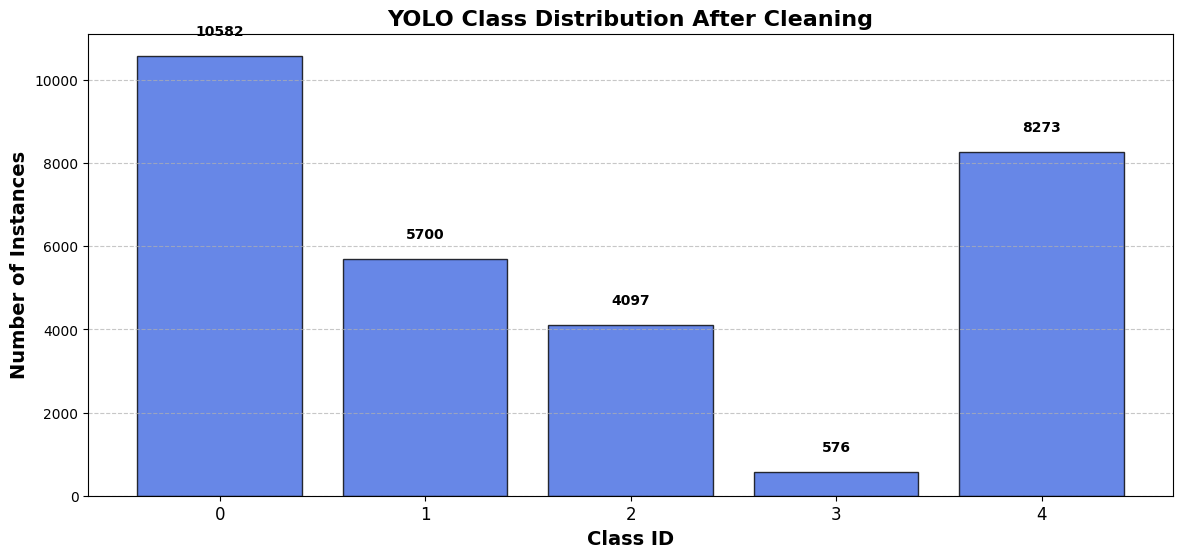

📊 Updated Class Distribution: Counter({0: 10582, 4: 8273, 1: 5700, 2: 4097, 3: 576})
Total Bounding Boxes: 29228


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define the path to your labels folder
labels_dir = r"/content/drive/MyDrive/merged_dataset/train/labels"  # Change to your actual path

# Initialize class counter
class_counts = Counter()

# Loop through all label files
for label_file in os.listdir(labels_dir):
    if label_file.endswith(".txt"):  # Process only YOLO label files
        with open(os.path.join(labels_dir, label_file), "r") as file:
            for line in file:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1  # Count occurrences

# Sort class IDs and counts
sorted_classes = sorted(class_counts.keys())
sorted_counts = [class_counts[c] for c in sorted_classes]

# Dynamically adjust bar width based on number of classes
bar_width = 0.8  # Default width
if len(sorted_classes) > 10:
    bar_width = 0.6  # Reduce width if too many classes

# Convert class IDs to a NumPy array for precise positioning
x_positions = np.arange(len(sorted_classes))

# Improved plot design with dynamic bar width
plt.figure(figsize=(14, 6))
bars = plt.bar(x_positions, sorted_counts, width=bar_width, color="royalblue", edgecolor="black", alpha=0.8)

# Add value labels on top of bars
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, str(count), ha="center", fontsize=10, fontweight="bold")

# Labels and title
plt.xlabel("Class ID", fontsize=14, fontweight="bold")
plt.ylabel("Number of Instances", fontsize=14, fontweight="bold")
plt.title("YOLO Class Distribution After Cleaning", fontsize=16, fontweight="bold")

# Customize x-axis
plt.xticks(x_positions, sorted_classes, fontsize=12)

# Grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# Print updated distribution
print("📊 Updated Class Distribution:", class_counts)
print("Total Bounding Boxes:", sum(class_counts.values()))

In [6]:
!yolo task=detect mode=train model=yolov8x.pt data=/content/drive/MyDrive/merged_dataset/data.yaml epochs=180 imgsz=640 patience=15 project=/content/drive/MyDrive/merged_dataset/runs_final/

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 131M/131M [00:00<00:00, 254MB/s]
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/merged_dataset/data.yaml, epochs=180, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/merged_dataset/runs_final/, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=